In [872]:
from scipy.signal import lfilter
from scipy.signal import find_peaks, peak_widths, peak_prominences
import numpy as np
import matplotlib.pyplot as plt

In [873]:
import numpy as np
from scipy.signal import butter,filtfilt

T = 1.0         # Sample Period
fs = 1000.0       # sample rate, Hz
cutoff = 50      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hznyq = 0.5 * fs  # Nyquist Frequencyorder = 2       # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples

nyq = 0.5 * fs  # Nyquist Frequency
order = 3       # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples

In [874]:
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

[  1.79500829   2.36052314   2.27457367   3.17475145   2.10660757
   4.76157133   4.41651497   3.6500587    2.19614558  30.74635369
   4.24047023   4.78288203   2.47733227   1.74707244  38.52377642
   2.36466504  51.76576909   6.75688376   9.07323723  58.1874576
  29.23255552   4.02131453   3.90922662   2.51770937   2.89328437
   2.91164383   2.63305038  12.37055902   2.87861964   6.94536215
   2.67182142   3.16886275   3.24738208   3.12248882   3.18755803
   7.03523807   3.36668283   3.31125871  17.92627173   2.17360844
   3.31858599   1.8431853    1.68356904   2.1590247    3.12310322
   9.3620137    1.83748548   2.68864507   3.38326755   2.89188161
   5.4101712    3.40600123   7.67493352   5.64379897   2.21111008
   3.64797671   2.50054342   3.69504608   4.66220019   2.29628867
  14.78694128   3.41266765   5.13505324   1.84639484   3.63854557
   4.41203733   8.59072283   2.82400894   6.04881875  10.49152038
   1.67818273  11.79801724   5.28867605  10.61069853  45.59190323
   7.277194

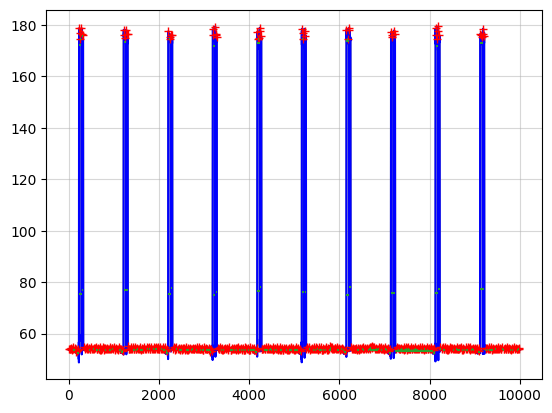

In [875]:
a=1.2393985838010886
b=1
c=-9.388948900526534

with open('profile.txt', 'r') as file:
    data_raw = [float(line.strip()) for line in file]

data = [(value/10)**(1 / b) / a - c for value in data_raw]

#data = data[0:1100]

x = np.arange(0, len(data), 1)

# n = 10  # the larger n is, the smoother curve will be
# b = np.ones(n) / n
# a = 1

yy = butter_lowpass_filter(data, 440, fs, order)

peaks = find_peaks(yy, height=27.1, distance=10, width=1)
width = peak_widths(yy, peaks[0], rel_height=0.8)
prom = peak_prominences(yy, peaks[0])

print(width[0])

peak_values = yy[peaks[0]]

average_peak = np.mean(peak_values)
std_dev_peak = np.std(peak_values)
confidence_interval = np.percentile(peak_values, [2.5, 97.5])

# Print the results
print(f"Average Peak: {average_peak}")
print(f"Standard Deviation of Peaks: {std_dev_peak}")
print(f"95% Confidence Interval of Peaks: {confidence_interval}")

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(x, data, '-', label='data', color='gray')
ax.plot(x, yy, 'b-', label='data')
ax.plot(peaks[0], yy[peaks[0]], 'r+', label='peaks')
#ax.plot(prom[1], yy[prom[1]], 'yv', label='prominence')

#plot peak widths
ax.hlines(*width[1:], color="C2")

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

plt.show()

<BarContainer object of 632 artists>

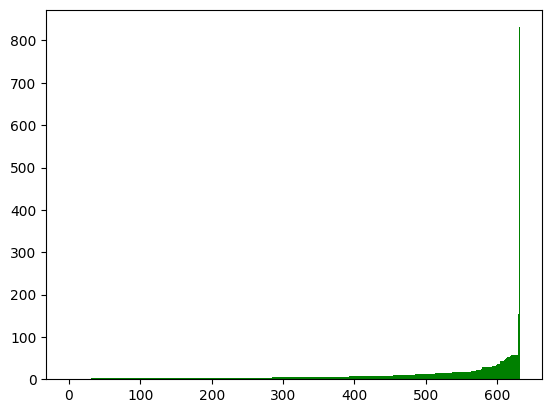

In [876]:
# plot peak widths on a bar chart
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.bar(range(len(width[0])), sorted(width[0]), width=1.0, color='g')



In [877]:
import pandas as pd

# Указываем путь к файлу Excel
excel_file_path = 'sensors.xlsx'

# Выбери нужный лист (если у тебя несколько)
sheet_name = 'Sheet1'  # изменить на нужное имя листа

# Считываем данные из Excel в DataFrame, пропуская первую строку
df = pd.read_excel(excel_file_path, sheet_name=sheet_name, header=None, skiprows=3)


In [878]:
base_values_raw = df.iloc[:, 2].astype(float)

base_values = [(value / 10)**(1 / b) / a - c for value in base_values_raw]

ybase_values = butter_lowpass_filter(base_values, 10, fs, order)

b_average_peak = np.mean(ybase_values)
b_std_dev_peak = np.std(ybase_values)
b_confidence_interval = np.percentile(ybase_values, [2.5, 97.5])

print(f"Average Peak: {b_average_peak}")
print(f"Standard Deviation of Peaks: {b_std_dev_peak}")
print(f"95% Confidence Interval of Peaks: {b_confidence_interval}")

Average Peak: 25.10982666294762
Standard Deviation of Peaks: 0.027651600621145574
95% Confidence Interval of Peaks: [25.04909731 25.15635544]


In [879]:
from matplotlib.offsetbox import AnchoredText

def textonly(ax, txt, fontsize = 14, loc = 2, *args, **kwargs):
    at = AnchoredText(txt,
                      prop=dict(size=fontsize), 
                      frameon=True,
                      loc=loc)
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    ax.add_artist(at)
    return at

def build_device_graph(idx, name, height, width=200, distance=100, wlen=500, title2='Time of 100 meas. ms'):
    y1_values_raw = df.iloc[:, idx].astype(float)

    y1_values = [(value / 10)**(1 / b) / a - c for value in y1_values_raw]

    yy1_values = butter_lowpass_filter(y1_values, 10, fs, order)

    peaks_d = find_peaks(yy1_values, height=height, distance=distance, width=width)
    width_d = peak_widths(yy1_values, peaks_d[0], rel_height=0.5)
    prom_d = peak_prominences(yy1_values, peaks_d[0], wlen=wlen)

    d_peak_values = yy1_values[peaks_d[0]]

    d_average_peak = np.mean(d_peak_values)
    d_std_dev_peak = np.std(d_peak_values)
    d_confidence_interval = np.percentile(d_peak_values, [2.5, 97.5])

    d_peak_widths = width_d[0]

    dw_average_peak = np.mean(d_peak_widths)
    dw_std_dev_peak = np.std(d_peak_widths)
    dw_confidence_interval = np.percentile(d_peak_widths, [2.5, 97.5])

    d_prom_values = yy1_values[prom_d[1]]

    d_average_prom = np.mean(d_prom_values)
    d_std_dev_prom = np.std(d_prom_values)
    d_prom_confidence_interval = np.percentile(d_prom_values, [2.5, 97.5])

    print(f"Average Peak: {d_average_peak}")
    print(f"Standard Deviation of Peaks: {d_std_dev_peak}")
    print(f"95% Confidence Interval of Peaks: {d_confidence_interval}")

    print(f"Average Peak Width: {dw_average_peak}")
    print(f"Standard Deviation of Peak Widths: {dw_std_dev_peak}")
    print(f"95% Confidence Interval of Peak Widths: {dw_confidence_interval}")

    print(f"Average Prom: {d_average_prom}")
    print(f"Standard Deviation of Proms: {d_std_dev_prom}")
    print(f"95% Confidence Interval of Proms: {d_prom_confidence_interval}")

    x_values = range(0, len(y1_values))

    # Create a single figure with two subplots in one row
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Plot the main power consumption line
    ax1.plot(x_values, yy1_values, label=name + ' power consumption, mA')
    ax1.plot(x_values, ybase_values, label='Baseline power consumption, mA')
    ax1.plot(peaks_d[0], yy1_values[peaks_d[0]], 'r+', label=name + ' active')
    ax1.plot(prom_d[1], yy1_values[prom_d[1]], 'yv', label=name + ' standby')

    ax1.axhline(y=d_average_peak, color='red')
    ax1.fill_between(x_values, d_confidence_interval[0], d_confidence_interval[1], color='red', alpha=.1)

    ax1.axhline(y=d_average_prom, color='olive')
    ax1.fill_between(x_values, d_prom_confidence_interval[0], d_prom_confidence_interval[1], color='olive', alpha=.1)

    ax1.set_xlabel('t, 1 ms')
    ax1.set_ylabel('I, mA')

    ax1.hlines(*width_d[1:], color="C2", label='Detected peaks')

    ax1.grid(which='both')
    ax1.grid(which='minor', alpha=0.2)
    ax1.grid(which='major', alpha=0.5)
    ax1.legend(loc='lower right')

    # Scatter plot of peak widths
    ax2.scatter(range(len(d_peak_widths)), d_peak_widths, color='green', marker='o', label=title2)
    ax2.axhline(y=dw_average_peak, color='green', label='Average Time')
    ax2.fill_between(range(len(d_peak_widths)), dw_confidence_interval[0], dw_confidence_interval[1], color='green', alpha=.1)

    ax2.set_xlabel('No. of Peak')
    ax2.set_ylabel(title2)
    ax2.set_ylim(dw_average_peak - dw_std_dev_peak*3, dw_average_peak + dw_std_dev_peak*3)

    ax2.legend(loc='upper right')

    #plt.tight_layout()  # Adjust layout for better spacing

    ax1.title.set_text(name + ' power consumption, mA')
    ax2.title.set_text(name +  ' ' + title2)

    plt.savefig(name + '_power_with_widths.png')
    plt.show()
    

Average Peak: 25.81131132760054
Standard Deviation of Peaks: 0.008111334284472558
95% Confidence Interval of Peaks: [25.79888705 25.8256459 ]
Average Peak Width: 216.8878546757573
Standard Deviation of Peak Widths: 1.9322789172443984
95% Confidence Interval of Peak Widths: [214.39437295 220.23356979]
Average Prom: 25.36685217951126
Standard Deviation of Proms: 0.02545759143734932
95% Confidence Interval of Proms: [25.32807026 25.41127225]


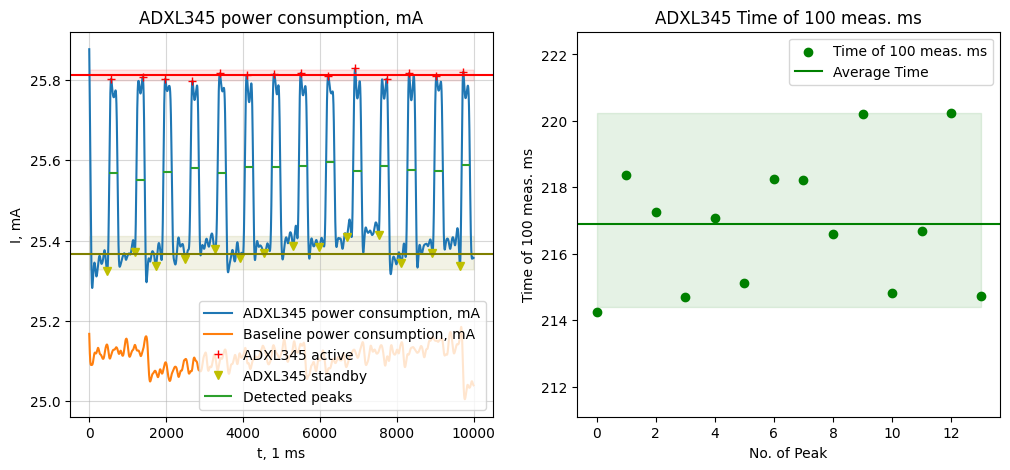

In [880]:
build_device_graph(0, 'ADXL345', 25.5)


Average Peak: 25.385059789625476
Standard Deviation of Peaks: 0.007702655253248464
95% Confidence Interval of Peaks: [25.37103822 25.39771097]
Average Peak Width: 254.2896980598826
Standard Deviation of Peak Widths: 10.92666762239443
95% Confidence Interval of Peak Widths: [243.23248277 278.80218399]
Average Prom: 25.177106143765716
Standard Deviation of Proms: 0.03386578351659757
95% Confidence Interval of Proms: [25.11957892 25.21753143]


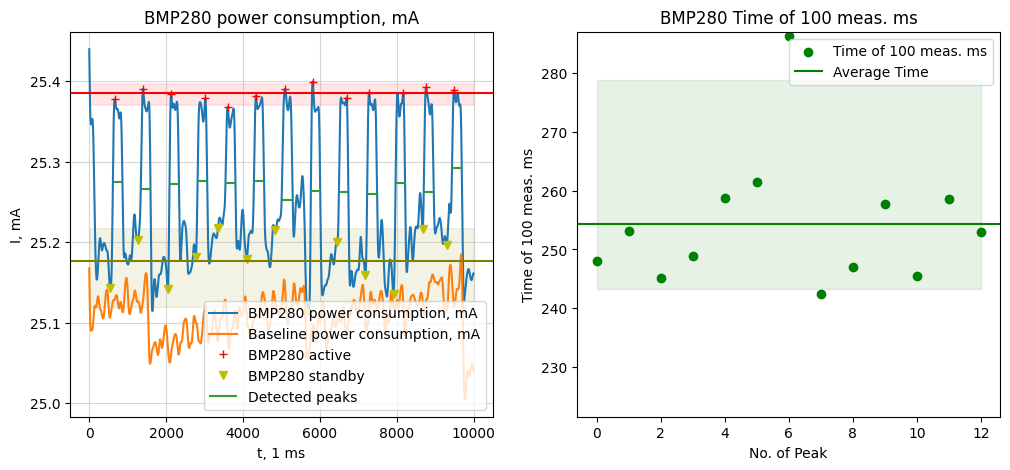

In [881]:
build_device_graph(1, 'BMP280', 25.3)

Average Peak: 173.2202077990582
Standard Deviation of Peaks: 0.5899595758723409
95% Confidence Interval of Peaks: [172.32929326 174.06456469]
Average Peak Width: 92.39488681851802
Standard Deviation of Peak Widths: 0.3295473205424264
95% Confidence Interval of Peak Widths: [91.95555676 92.9232801 ]
Average Prom: 52.20748105046516
Standard Deviation of Proms: 0.2640533159091509
95% Confidence Interval of Proms: [51.93208358 52.65685304]


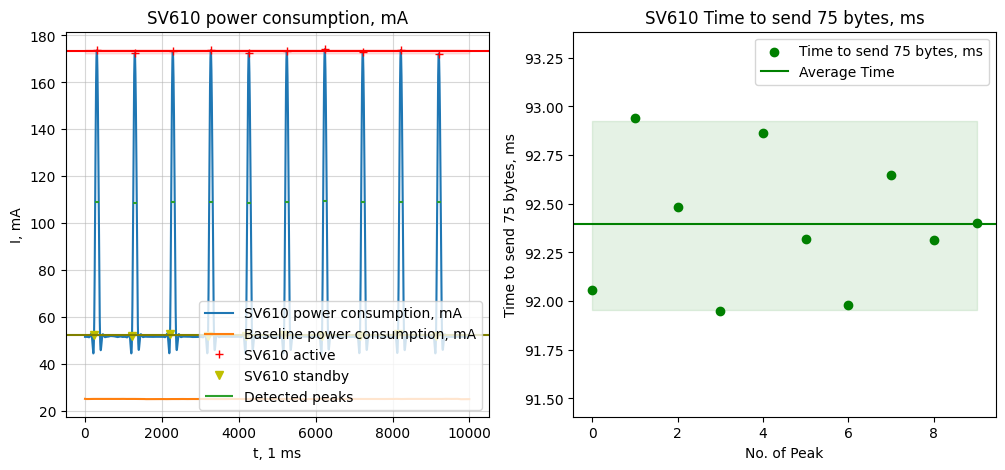

In [882]:
build_device_graph(4, 'SV610', 100, width=10, wlen=145, title2='Time to send 75 bytes, ms')

Average Peak: 25.123501769156146
Standard Deviation of Peaks: 0.028044463248986556
95% Confidence Interval of Peaks: [25.05750891 25.16895085]
Average Peak Width: 112.84002123435624
Standard Deviation of Peak Widths: 95.30721256027603
95% Confidence Interval of Peak Widths: [ 19.5464077 397.9865586]
Average Prom: 25.087846108200175
Standard Deviation of Proms: 0.027562138623189323
95% Confidence Interval of Proms: [25.01820501 25.12065185]


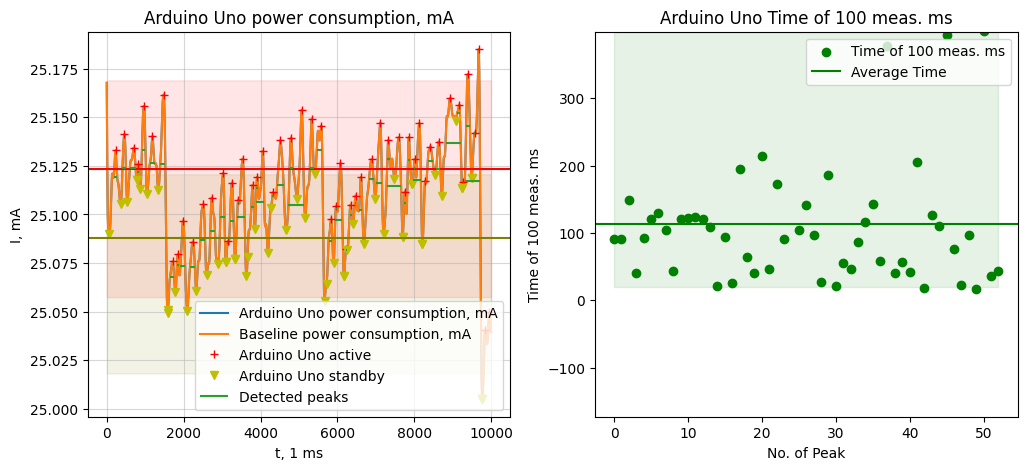

In [883]:
build_device_graph(2, 'Arduino Uno', 10, width=10)